In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, optimizers, datasets, models

%matplotlib inline

Using TensorFlow backend.


In [2]:
# load the mnist dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

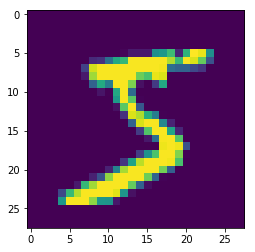

In [3]:
plt.imshow(x_train[0])

## Encoder

In [4]:
# 28x28x1
image_input = layers.Input(shape=(28,28, 1))

# 14x14x32
conv_1 = layers.Conv2D(filters=32, kernel_size=(2,2), strides=(2,2), 
                       activation="relu", padding="valid", name="conv_1")(image_input)

# 7x7x64
conv_2 = layers.Conv2D(filters=64, kernel_size=(2,2), strides=(2,2), 
                       activation="relu", padding="valid", name="conv_2")(conv_1)

# 1x3136
encode = layers.Flatten(name="encode")(conv_2)

encode_dense = layers.Dense(units=6048, activation="relu", name="encode_dense")(encode)

decode_dense = layers.Dense(units=3136, activation="relu")(encode_dense)

# 7x7x64
flat_deconv = layers.Reshape(target_shape=(7, 7, 64), name="flat_encode")(decode_dense)

# 14x14x32
deconv_1 = layers.Conv2DTranspose(filters=32, kernel_size=(2,2), strides=(2,2), 
                                  activation="relu", padding="valid", name="deconv_1")(flat_deconv)

# 28x28x1
deconv_2 = layers.Conv2DTranspose(filters=1, kernel_size=(2,2), strides=(2,2), 
                                  activation="relu", padding="valid", name="deconv_2")(deconv_1)

model = models.Model(inputs=image_input, outputs=deconv_2)

In [5]:
# load the mnist dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = np.expand_dims(a=x_train, axis=3) / 255
x_train.shape

(60000, 28, 28, 1)

In [6]:
model.compile(loss="mse", optimizer="adam")

In [8]:
model.fit(x=x_train, y=x_train, batch_size=128, validation_split=0.15, verbose=1)

Train on 51000 samples, validate on 9000 samples
Epoch 1/1
51000/51000 [==============================] - 297s 6ms/step - loss: 0.0140 - val_loss: 0.0032


In [94]:
num = model.predict(first_five).reshape((28,28))

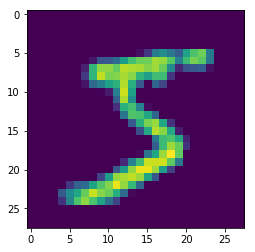

In [95]:
plt.imshow(num)

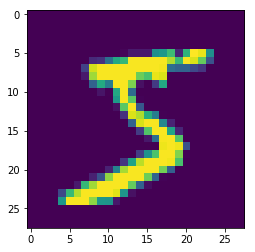

In [104]:
plt.imshow(first_five.reshape(28,28))

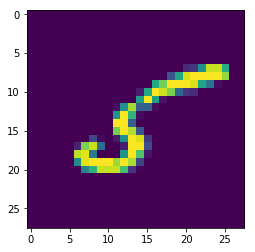

In [105]:
plt.imshow(second_five.reshape(28,28))

In [74]:
first_five = x_train[y_train == 5][0].reshape((-1,28,28,1))
second_five = x_train[y_train == 5][1].reshape((-1,28,28,1))

In [45]:
import keras.backend as K

flat_layer = model.layers[3]
encode_layer = model.layers[4]
# encode_layer = [layer for layer in model.layers if layer.name == "encode_dense"][0]

In [46]:
input_ = model.input

In [47]:
func = K.function(inputs=[input_], outputs=[encode_layer.output, flat_layer.output])

In [84]:
encode_1, flat_1 = func([first_five])
encode_2, flat_2 = func([second_five])

In [85]:
encode_1, encode_2 = encode_1[0], encode_2[0]
flat_1, flat_2 = flat_1[0], flat_2[0]

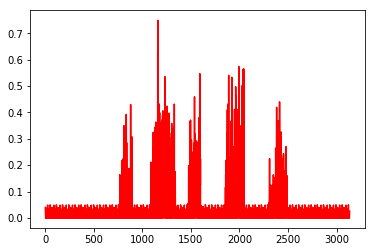

In [97]:
plt.plot(flat_2, color='red')

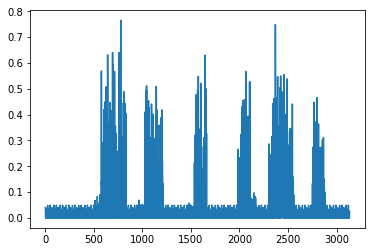

In [89]:
plt.plot(flat_1)

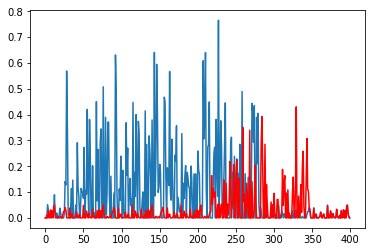

In [96]:
plt.plot(flat_1[550:950])
plt.plot(flat_2[550:950], color='red')

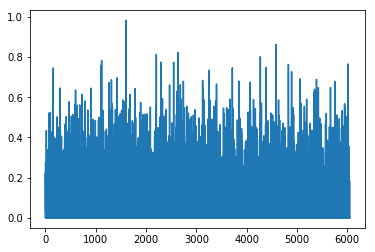

In [99]:
plt.plot(encode_1)

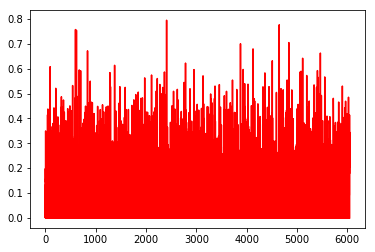

In [100]:
plt.plot(encode_2, color='red')

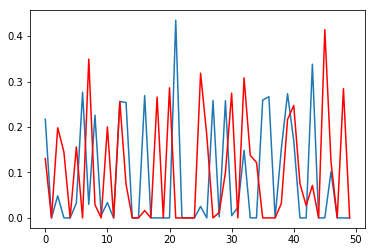

In [102]:
plt.plot(encode_1[0:50])
plt.plot(encode_2[0:50], color='red')